In [20]:
import mvts_utils as mv
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
time = np.arange(0,1000,.1)

In [9]:
a,b = mv.make_time_series_for_classification(time)

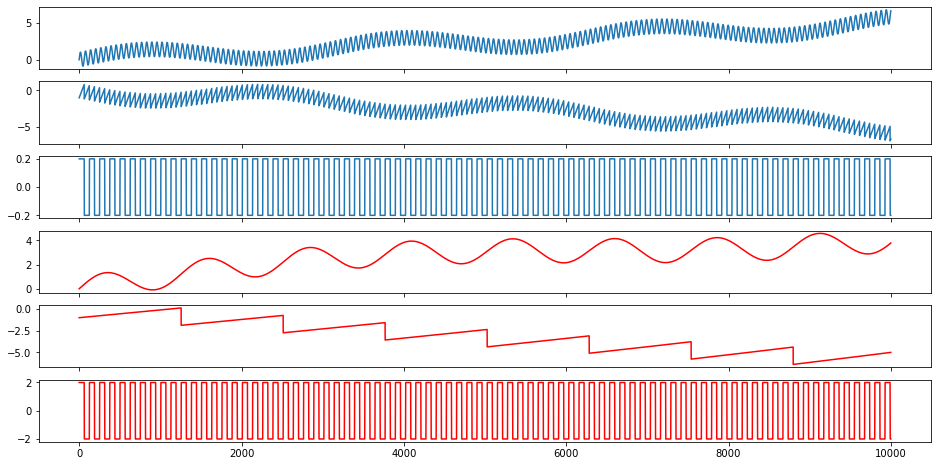

In [11]:
mv.plot_signals(a,b)

In [12]:
a = mv.add_noise(a,noise=5)
b = mv.add_noise(b,noise=5)

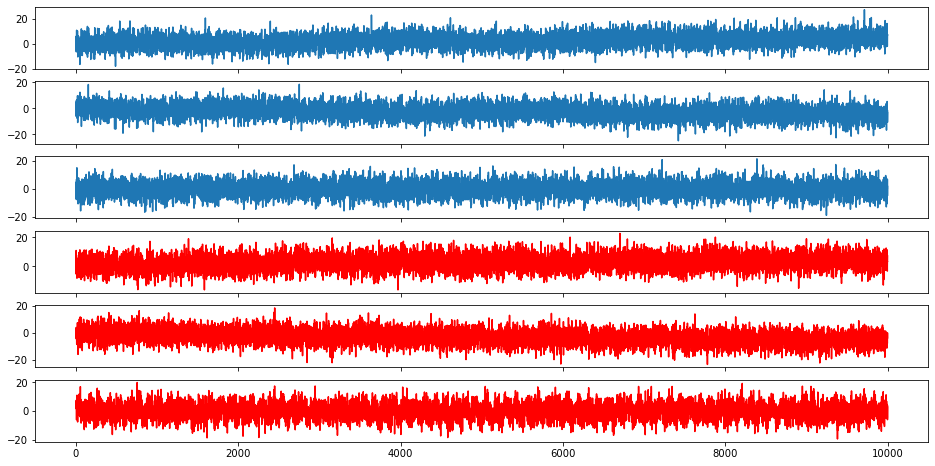

In [13]:
mv.plot_signals(a,b)

In [14]:
df = mv.convert_to_df(a,b)

# Feature Extraction

In [15]:
df_feat = mv.extract_features_from_df(df)

Feature Extraction: 100%|██████████| 30/30 [00:01<00:00, 19.02it/s]


In [17]:
x,y = mv.convert_to_xy(df_feat)

# Classification

In [55]:
clf_pipeline = make_pipeline(StandardScaler(), LogisticRegression(random_state=37))
scores = cross_val_score(clf_pipeline, x, y, cv=100)

0.5509999999999999


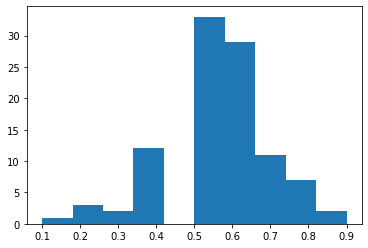

In [56]:
plt.hist(scores)
print(np.mean(scores))